In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
import category_encoders as ce
import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
raw_data = pd.read_csv('data/365_classification_data.csv')

In [4]:
raw_data.head()

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,paid_student
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,258799,CO,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,1.0
3,258801,IN,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258802,US,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for column in raw_data.columns[3:]:
    raw_data[column] = raw_data[column].fillna(0)

In [6]:
raw_data.head()

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,paid_student
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,258799,CO,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,1.0
3,258801,IN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,258802,US,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = raw_data.copy()
features = data.drop(data.columns[[0, 2, -1]], axis = 1)

In [8]:
features

,student_country,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
0,IN,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CA,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0
3,IN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35225,CM,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35226,CA,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35227,SA,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35228,NL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
target = data.drop(data.columns[0:-1], axis = 1)

In [10]:
target

,paid_student
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
35225,0.0
35226,0.0
35227,0.0
35228,0.0


In [11]:
features

,student_country,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
0,IN,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CA,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0
3,IN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35225,CM,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35226,CA,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35227,SA,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35228,NL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
he = ce.HashingEncoder(cols='student_country')
features_hash = he.fit_transform(features)
features_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
0,0,0,0,1,0,0,0,0,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0
3,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35225,0,0,0,1,0,0,0,0,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35226,0,1,0,0,0,0,0,0,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35227,0,0,0,0,0,0,0,1,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35228,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
corr = features_hash.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
col_0,1.00,-0.08,-0.15,-0.25,-0.16,-0.11,-0.09,-0.11,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,0.00,-0.01,0.00
col_1,-0.08,1.00,-0.09,-0.15,-0.09,-0.07,-0.06,-0.06,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.02,-0.01
col_2,-0.15,-0.09,1.00,-0.28,-0.18,-0.12,-0.11,-0.12,0.07,0.07,0.07,0.06,0.07,0.03,0.07,0.06,0.02
col_3,-0.25,-0.15,-0.28,1.00,-0.29,-0.20,-0.17,-0.20,-0.03,-0.03,-0.04,-0.03,-0.04,-0.00,-0.04,-0.05,-0.03
col_4,-0.16,-0.09,-0.18,-0.29,1.00,-0.13,-0.11,-0.13,-0.04,-0.04,-0.05,-0.04,-0.05,-0.02,-0.05,-0.03,-0.02
col_5,-0.11,-0.07,-0.12,-0.20,-0.13,1.00,-0.08,-0.09,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00
col_6,-0.09,-0.06,-0.11,-0.17,-0.11,-0.08,1.00,-0.07,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.02,0.03
col_7,-0.11,-0.06,-0.12,-0.20,-0.13,-0.09,-0.07,1.00,0.00,0.01,0.02,0.02,0.03,0.00,0.02,0.01,0.02
mins_watched_after_7_days,-0.01,0.03,0.07,-0.03,-0.04,-0.00,-0.00,0.00,1.00,0.92,0.49,0.50,0.48,0.21,0.39,0.49,0.26
mins_watched_after_14_days,-0.01,0.03,0.07,-0.03,-0.04,-0.00,0.00,0.01,0.92,1.00,0.56,0.60,0.56,0.26,0.38,0.49,0.23


In [14]:
features_hash = features_hash.drop(columns = ['num_quizzes_engaged', 'num_exams_engaged'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features_hash, target , test_size = 0.2, random_state=42)

In [16]:
sm = SMOTE(k_neighbors = 5)
enn = EditedNearestNeighbours(n_neighbors = 5)
sm = SMOTEENN(sampling_strategy = 'minority', smote = sm, enn = enn)
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)

In [17]:
# columns_to_scale = ['mins_watched_after_7_days', 'mins_watched_after_14_days', 'days_engaged',
#                     'questions_hub_engaged', 'quizzes_engaged', 'exams_engaged', 'lessons_engaged']
# scaler = MinMaxScaler()
# scaler.fit(X_train_up[columns_to_scale])
# X_train_up[columns_to_scale] = scaler.transform(X_train_up[columns_to_scale])
# X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      6638
         1.0       0.79      0.68      0.74       408

    accuracy                           0.97      7046
   macro avg       0.89      0.84      0.86      7046
weighted avg       0.97      0.97      0.97      7046



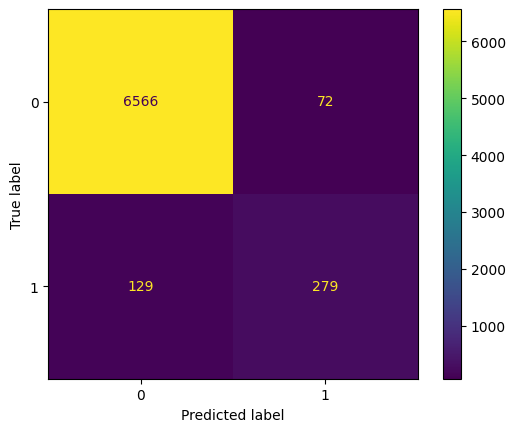

In [18]:
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train_up, y_train_up)# In[ ]:
y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

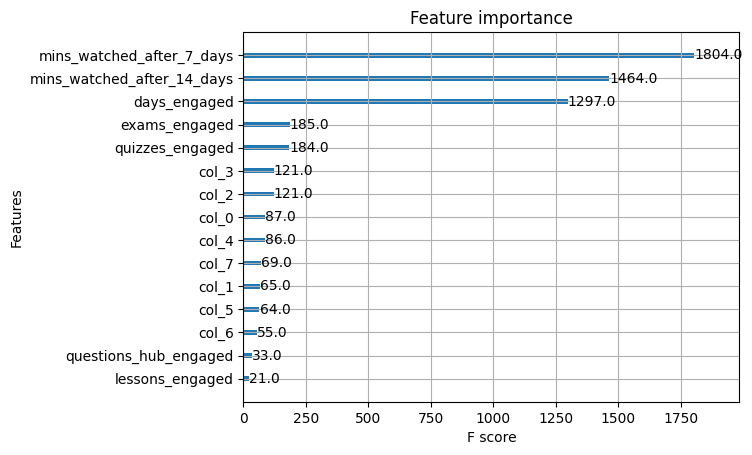

In [19]:
plot_importance(model_xgb)
plt.show()

In [33]:
parameters = {
    'max_depth': list(range(2, 10)),
    'max_depth': [3,6,10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000]
}

clf = GridSearchCV(estimator=model_xgb, 
                   param_grid=parameters,
                   scoring='f1', 
                   verbose=1,
                   n_jobs=-1)

clf.fit(X_train_up, y_train_up)

print('Best score: %0.3f' % clf.best_score_)
print('Best estimator: ', clf.best_estimator_)
predictions = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best score: 0.984
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6638
         1.0       0.79      0.73      0.76   

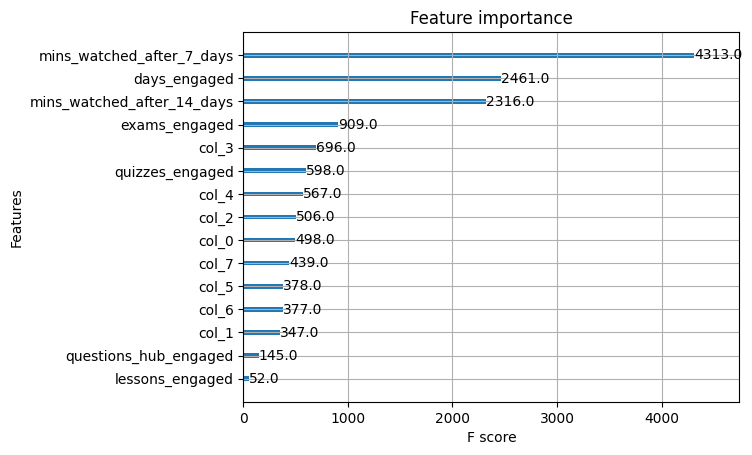

In [34]:
plot_importance(clf.best_estimator_)
plt.show()

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      6638
         1.0       0.79      0.70      0.74       408

    accuracy                           0.97      7046
   macro avg       0.88      0.84      0.86      7046
weighted avg       0.97      0.97      0.97      7046



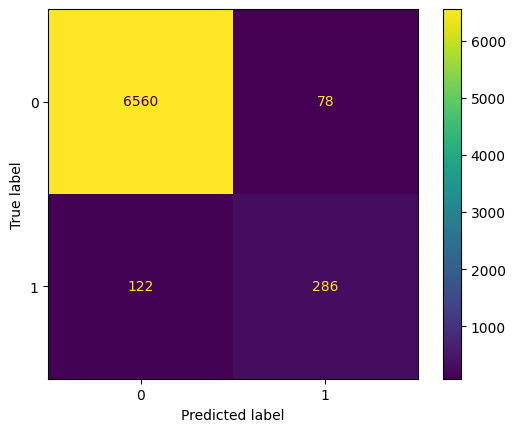

In [35]:
model_rfc = RandomForestClassifier(random_state=42, n_estimators = 200)
model_rfc.fit(X_train_up, y_train_up.values.ravel())
y_pred = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best score: 0.984
Best estimator:  RandomForestClassifier(max_depth=80, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200, random_state=42)
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6638
         1.0       0.78      0.72      0.75       408

    accuracy                           0.97      7046
   macro avg       0.88      0.85      0.87      7046
weighted avg       0.97      0.97      0.97      7046



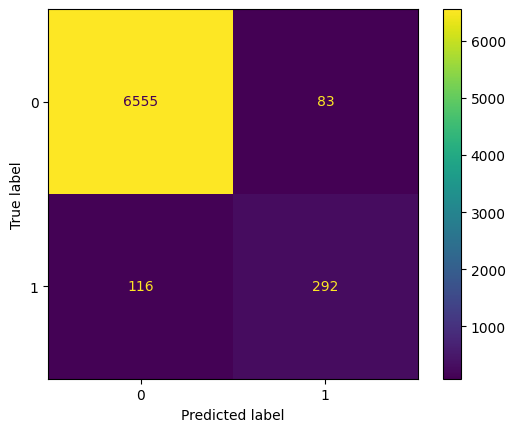

In [36]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

clf_rfc = GridSearchCV(estimator=model_rfc, 
                   param_grid=param_grid,
                   scoring='f1', 
                   verbose=1,
                   n_jobs=-1)

clf_rfc.fit(X_train_up, y_train_up.values.ravel())

print('Best score: %0.3f' % clf_rfc.best_score_)
print('Best estimator: ', clf_rfc.best_estimator_)
predictions = clf_rfc.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

<Axes: >

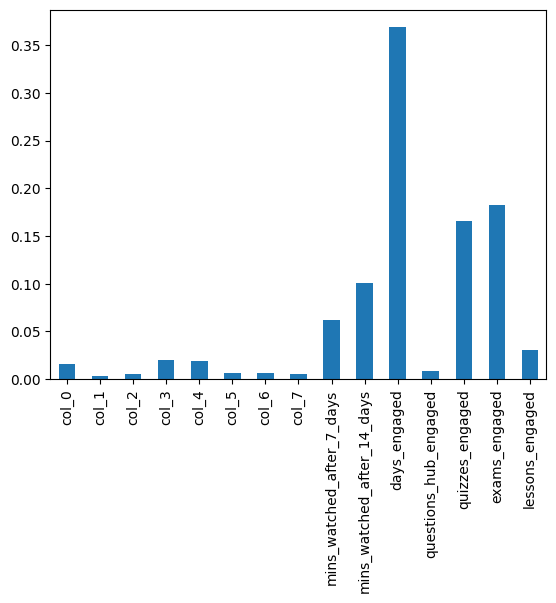

In [37]:
forest_importances = pd.Series(clf_rfc.best_estimator_.feature_importances_, 
                               index=X_train_up.columns)
forest_importances.plot.bar()

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6638
         1.0       0.75      0.75      0.75       408

    accuracy                           0.97      7046
   macro avg       0.87      0.87      0.87      7046
weighted avg       0.97      0.97      0.97      7046



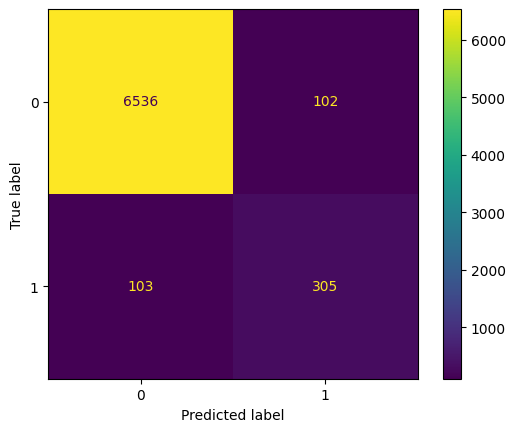

In [38]:
model_gbc = GradientBoostingClassifier(random_state=42, n_estimators = 200)
model_gbc.fit(X_train_up, y_train_up.values.ravel())# In[ ]:
y_pred = model_gbc.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best score: 0.976
Best estimator:  GradientBoostingClassifier(learning_rate=0.05, n_estimators=400,
                           random_state=42)
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6638
         1.0       0.75      0.75      0.75       408

    accuracy                           0.97      7046
   macro avg       0.87      0.87      0.87      7046
weighted avg       0.97      0.97      0.97      7046



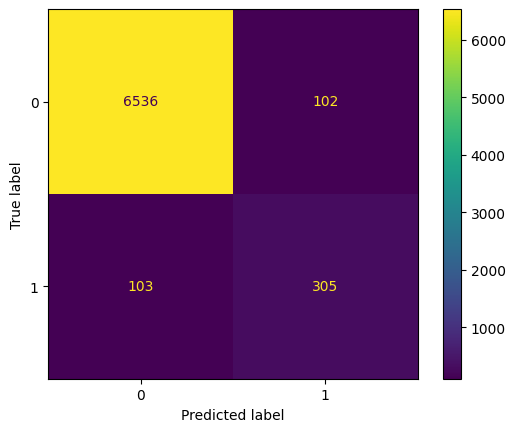

In [39]:
parameters = {
    'max_depth': [3],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200, 400]
}

clf_gbc = GridSearchCV(estimator=model_gbc, 
                   param_grid=parameters,
                   scoring='f1', 
                   verbose=1)

clf_gbc.fit(X_train_up, y_train_up.values.ravel())

print('Best score: %0.3f' % clf_gbc.best_score_)
print('Best estimator: ', clf_gbc.best_estimator_)
predictions = clf_gbc.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

<Axes: >

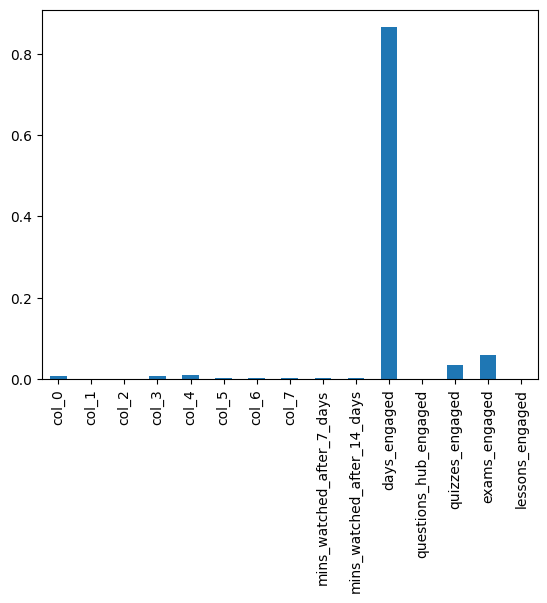

In [40]:
forest_importances = pd.Series(clf_gbc.best_estimator_.feature_importances_, 
                               index=X_train_up.columns)
forest_importances.plot.bar()

In [41]:
clf.best_estimator_.fit(features_hash, target.values.ravel())# In[ ]:
y_pred = clf.best_estimator_.predict(features_hash)
y_pred_proba = clf.best_estimator_.predict_proba(features_hash)
y_pred.shape
y_pred_proba.shape

(35230, 2)

In [42]:
data = data.assign(predictions = y_pred)

In [43]:
data = data.assign(convert_proba = y_pred_proba[:, 1])

In [44]:
data

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,paid_student,predictions,convert_proba
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.005007
1,258799,CO,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005542
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,1.0,1,0.984852
3,258801,IN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005542
4,258802,US,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.031481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.006513
35226,295512,CA,2022-10-20,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0.012238
35227,295513,SA,2022-10-20,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.012707
35228,295514,NL,2022-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.008464


In [45]:
final_pred = data.drop(columns = ['paid_student', 'predictions'])

In [46]:
final_pred

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,convert_proba
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.005007
1,258799,CO,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005542
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,0.984852
3,258801,IN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005542
4,258802,US,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.006513
35226,295512,CA,2022-10-20,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.012238
35227,295513,SA,2022-10-20,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.012707
35228,295514,NL,2022-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008464


In [1]:
final_pred.to_csv('final_prediction_data.csv')

NameError: name 'final_pred' is not defined